# Introduction
- This is the code used for Sentiment Analysis
- The sections and content should approximate the submitted written report.
- Please refer to written report section **J., Sources**
- Please, refer to the written report: formatting as intended. Some charts, references, and organization may not align (sections of code and plots may not be grouped as nicely and clearly with written content.) Formatting should be cleaner and clearer in the Word Document.
# Import Packages

In [2]:
# Import Packages
%matplotlib inline
# Matplotlib is a plotting library
import matplotlib.pyplot as plt
# NLTK is a platform for building programs in Python that work with human language data.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Numpy working with arrays and matrices, along with mathematical functions for arrays
import numpy as np
# os is for working with the operating system.
import os
# Pandas is used for data manipulation and analysis. Excel like tools
import pandas as pd
from pandas import Series, DataFrame
# re is for regular expressions
import re
# Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
# Sklearn is a machine learning library. 
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import train_test_split # train_test_split function to split arrays or matrices into random train and test subsets
# import warnings module to ignore warnings which are not issued by the interpreter but by libraries.
import warnings
warnings.filterwarnings('ignore')

# TensorFlow is an open source machine learning framework. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer # vectorize
from tensorflow.keras.preprocessing.sequence import pad_sequences # padding

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D, GlobalAveragePooling1D

import sys # System functions

from tensorflow.keras.utils import to_categorical

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# TensorFlow version
tf.__version__

'2.15.0'

# Load Data

In [3]:
directory_path = os.getcwd()
print("My current directory is : " + directory_path)
pd.options.display.max_colwidth = 400
# read amazon_cells_labelled.txt
df_amazon = pd.read_csv("../amazon_cells_labelled.txt", sep='\t', header=None, names = ['Review', 'Score'])
# add column identifying source of data
df_amazon['Source'] = 'amazon'
# load yelp file
df_yelp = pd.read_csv("../yelp_labelled.txt", sep='\t', header=None, names = ['Review', 'Score'])
df_yelp['Source'] = 'yelp'
# read imdb_labelled.txt
df_imdb = pd.read_csv("../imdb_labelled.txt", sep='  \t', header=None, names = ['Review', 'Score'])
df_imdb['Source'] = 'imdb'
# combine into one dataframe, df
df = pd.concat([df_amazon, df_yelp, df_imdb], ignore_index= True)

print('imdb number of row:', len(df_amazon)) 
print('yelp number of row:', len(df_yelp)) 
print('imdb number of row:', len(df_imdb))
print('Shape of data:', df.shape)
df

My current directory is : c:\Users\pinlo\OneDrive\Desktop\WGU\d213-wgu\submissions
imdb number of row: 1000
yelp number of row: 1000
imdb number of row: 1000
Shape of data: (3000, 3)


,Review,Score,Source
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I just got bored watching Jessice Lange take her clothes off!,0,imdb
2996,"Unfortunately, any virtue in this film's production work was lost on a regrettable script.",0,imdb
2997,"In a word, it is embarrassing.",0,imdb
2998,Exceptionally bad!,0,imdb


# Part I: Research Question

## A1: Research Question
- The research question this paper hopes to address is: Can the sentiment of a review be predicted based on the sentiment of analyzing other reviews using neural networks and natural language processing (NLP). The reviews used in this analysis are from a dataset called Sentiment Labelled Sentences, provided by the UC Irvine Machine Learning Repository (Kotzias, 2015).
## A2: Objectives and Goals
- The aim of this project is to predict the sentiment of a review for an item based on the sentiment of other reviews using neural networks and NLP techniques. 
## A3: Prescribed Network
- For this analysis, a Feedforward Neural Network (FFNN) will be used. A FFNN is a type of Artificial Neural Network (ANN) that processes data in a forward direction, from input to output, without any feedback connections. This type of network is often used for pattern recognition and classification tasks, including sentiment analysis, due to its low complexity and quick execution (GeeksforGeeks, 2023).
- In the context of this project, the FFNN will be used to predict the sentiment of a review based on its content. This approach is suitable for the dataset, which contains binary data (either a positive or negative review) (Sharma, 2022).
- The model is constructed by implementing an embedding layer followed by multiple hidden dense layers. The embedding layer maps each word in the input sequence to a high-dimensional vector, which is then fed into the dense layers for further processing. These dense layers apply nonlinear transformations to the input data and use an activation function to produce a binary classification prediction for each review (N. Kumar, 2019).

# Part II: Data Preparation

## B1: Data Exploration
- The exploratory data analysis (EDA) of the dataset reveals key insights into its structure and content. The dataset consists of 3000 rows with two columns: Review and Score. The Review column is of the object datatype, while the Score column is of the integer datatype. The mean score is 0.5000, which aligns with the expected distribution of positive and negative reviews. Code used for this analysis has been submitted as Jupyter Notebook and pdf with the code used in the analysis, including for data exploration.

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3000 non-null   object
 1   Score   3000 non-null   int64 
 2   Source  3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB
None

describe:
             Score
count  3000.000000
mean      0.500000
std       0.500083
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000
                  Review  Source
count               3000    3000
unique              2982       3
top     Not recommended.  amazon
freq                   2    1000

NULLS:
Review    0
Score     0
Source    0
dtype: int64

Duplicated:
17

Shape of data after dropping NULLS: (3000, 3)

Count of Score:
 Score
0    1500
1    1500
Name: count, dtype: int64


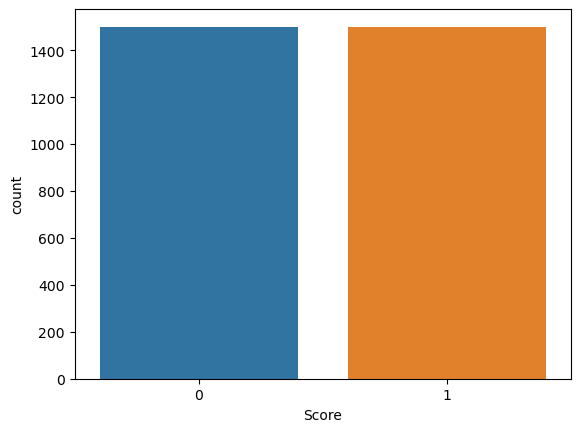

In [35]:
print('Info:') 
print(df.info())

print('\ndescribe:') 
print(df.describe())
print(df.describe(include=object))
# Evaluate the dataset for missing values and duplicate rows
print('\nNULLS:') 
print(df.isnull().sum())
print('\nDuplicated:') 
print(df.duplicated().sum())
df=df.dropna() # No nulls, but this is where they would be dropped
# confirm shape
print('\nShape of data after dropping NULLS:', df.shape)
# Assess Scores
sns.countplot(x='Score', data=df)
print('\nCount of Score:\n', df['Score'].value_counts())

In [ ]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

### B1_A: Presence of Unusual Characters
- An initial inspection of the reviews using the head() method revealed the presence of non-standard characters, such as emojis, symbols, and special characters. To quantify the extent of this issue, a Python script was used to extract a list of all unique characters present in the reviews. The resulting list contained 89 characters, indicating a significant presence of unusual characters. After cleaning, only 26 characters were retained, significantly reducing the complexity of the data.
- The output and code used to detect the characters in the dataset is shown below:
- 'Review' is the column name, and the dataframe is labelled 'df'

In [3]:
# Detect/Explore the characters that are in the set
review = df['Review']
list_of_characters = []
for comment in review:
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', '.', 'G', 'd', ',', 'E', 'x', 'j', 'T', '4', '5', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'N', 'W', 'q', 'H', '+', 'V', '"', 'Y', 'D', 'F', 'k', "'", 'K', 'C', '/', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']', 'é', 'ê', '\x96', '\x85', 'å', '\x97']


In [4]:
total_items = len(list_of_characters)
print(total_items)

89


### B1-B Measure vocabulary size
- Vocabulary size tells how many unique words are in the dataset. The vocabulary size of the untreated reviews was determined using a tokenizer. The Tokenizer() class from the Keras preprocessing library was used to fit the tokenizer on the reviews, and the vocabulary size was calculated as the length of the word_index dictionary plus one. The resulting vocabulary size was 5272. After removing stopwords, the vocabulary size reduced to 4952.

In [4]:
# Identify vocabulary size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review'])
print("Tokenizer Vocabulary size: ", len(tokenizer.word_index) + 1)
# before any cleaning: 5272
# after removing stopwords 4952
# after lemmitazation 4559

Tokenizer Vocabulary size:  5272


### B1-C Proposed Word Embedding Length
- Word embedding is a technique used to represent words as vectors of numbers, allowing the model to learn semantic relationships between words. The appropriate length of the embedding vector, known as the embedding dimension, is typically determined by the size of the vocabulary. A common approach is to use the fourth root of the vocabulary size as the embedding dimension. For the precleaned data, the embedded length is around 9, and after cleaning, it is around 8. This length is chosen to balance the complexity of the model and the computational resources available.  This will be used as a starting point, but should be verified and tuned in the analysis (Carremans, 2019). The code used to calculate the initial word embedding length is shown below:

In [5]:
vocab_size = 5272 # enter vocabulary size
word_embedding_length = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
word_embedding_length

9

### B1-D Statistical justification for the chosen maximum sequence length
- The maximum sequence length is a hyperparameter that determines the maximum length of each text sequence processed by the model. A suitable maximum sequence length can improve model performance by preventing the model from being overwhelmed by excessively long sequences and by ensuring that all sequences are represented uniformly. Text sequences shorter than the maximum sequence length are addressed by padding, so all the text sequences after processing are the same length.
- To determine an appropriate maximum sequence length for our dataset, the distribution of the lengths of the text sequences were examined. Using the **np.percentile()** function, the 95th percentile of the sequence lengths was calculated. For the pre-cleaned data, the 95th percentile was 26, indicating that 95% of the sequences were less than or equal to 26 words in length. After further cleaning, the 95th percentile dropped to 13, suggesting that a maximum sequence length of 13 would be sufficient for capturing the vast majority of the information in the reviews. The code and output to do this is show below:

In [42]:
review_length = []

for review in df['Review']:
    review_length.append(len(str(review).split(' ')))

average_length = int(round(np.mean(review_length)))
print("Average review length: ", average_length)

max_length = np.percentile(review_length, 95)  # 95th percentile. 99th also used
print("Max length (95 percentile): ", max_length)
# pre-removing stopwords 12|26
# pre-lemmitzation 6|13 ; same with lemmitzation

Average review length:  12
Max length (95 percentile):  26.0


- In addition to the 95th percentile, the mean, median, minimum, and maximum sequence lengths were considered. For the pre-cleaned data, the mean was 12, the median was 10, the minimum was 1, and the maximum was 71. After cleaning, the mean dropped to 6, the median remained at 5, the minimum remained at 1, and the maximum was 44. The output and code to do this is demonstrated below on the initial data:

In [43]:
commentary_length = []
for char_len in df['Review']:
    commentary_length.append(len(str(char_len).split(' ')))
    
commentary_max = np.max(commentary_length)
commentary_min = np.min(commentary_length)
commentary_median = np.median(commentary_length)
print("The maximum length of our sequences would be:", commentary_max)
print("The median length of our sequences would be:", commentary_median)
print("The minimum length of our sequences would be:", commentary_min)
# preremoving stopwords 71|10|1
# pre lemitzation 44|5|1

The maximum length of our sequences would be: 71
The median length of our sequences would be: 10.0
The minimum length of our sequences would be: 1


- Based on these statistical considerations, a maximum sequence length of 13 will be the initial value for the initial maximum sequence length that will be used in this experiment. This choice is consistent with the distribution of the sequence lengths and should allow the model to effectively process the majority of the reviews while preventing it from being overwhelmed by excessively long sequences. Like some of the other settings discussed, this can be tuned when evaluating the performance of the model.

## B2: Tokenization
- Tokenization is the process of breaking up text into individual words, characters, or sub-words, which are called tokens. It separates text into smaller chunks or tokens. The goals of tokenization include replacing any abnormal characters, formatting, and standardizing texts, transforming the text into sequences, preparing the transformed sequences to a maximum sequence length by padding, and assigning a unique index called “word_index” to each word in the text which helps the model during the training process (Awan, 2023).
- The Python code used in tokenization includes the **re** package for regular expressions, which was used to remove punctuation and special characters, and the **lower()** method to convert to lower case. The **nltk.tokenize word_tokenize** method was used to perform the tokenization, and the **nltk.corpus stopwords** method was used to remove stopwords. The code used is shown below:

In [8]:
description_list = []
stop_words = stopwords.words('english')
for description in df.Review:
    # Regular Expression, removes punctuation and special characters.
    description = re.sub("[^a-zA-Z]", " ", description)
    
    # Convert to lower case
    description = description.lower()
    
    # Perform tokenization
    description=nltk.word_tokenize(description)
    
    # Remove stopwords
    description = [word for word in description if not word in stop_words]
    description = " ".join(description)
    description_list.append(description)

### Exploration of Tokenized Data

In [9]:
# Display first five after they are preprocessed
description_list[0:5]

['way plug us unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversations lasting minutes major problems',
 'mic great']

In [1]:
# print(stop_words)

### Splitting the Data
- In this code, the train_test_split function from the sklearn.model_selection module is used to split the data into training and testing sets. The test_size parameter is set to 0.2, which means that 20% of the data is used for the testing set. The random_state parameter is set to 9 to ensure that the splits you generate are reproducible. The stratify parameter is set to y to ensure that the distribution of classes in the training and testing sets is the same as the distribution of classes in the original dataset

In [10]:
# Splitting the data into training and test set
X = np.array(description_list) # vectorized, tokenized reviews
y = df.Score.values # negative or positive rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify= y)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# View the training and testing sample sizes
print("Training size: ", X_train.shape)
print("Testing size: ", X_test.shape)

print("y Training size: ", y_train.shape)
print("y Testing size: ", y_test.shape)


Training size:  (2400,)
Testing size:  (600,)
y Training size:  (2400,)
y Testing size:  (600,)


In [11]:
# max_length = max(len(word) for word in X_train) # Set the max length to maximum length
# Define the variables that will be used to override the defaults. Set parameters for vocab size, embedding dimensions, and padding settings
vocab_size = 4340
oov_tok = "<oov>" # oov stands for Object Oriented Verification
embedding_dim = 9 # 16
max_length = 13 # 350 maximum length. 13 length 95% of cleaned data
trunc_type= 'post'
padding_type= 'post'

In [12]:
# Perform tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# print(word_index) # Consider commenting out in final report. Leads to large PDF size

## B3: Padding Process
- Padding is a technique used in neural networks to standardize the length of sequences. It is used to preserve the shape of tensor dimensions, which are multidimensional arrays. In this context, 1D is a vector, 2D is a matrix, and 3D is a cuboid. Neural networks require the input to be of the same shape and size.
- Padding involves adding additional elements, typically zeros, to shorter sequences to match the length of the longest sequence in the dataset. This ensures that all input sequences have the same dimensionality, allowing neural networks to process them effectively.
- In Python, the **pad_sequences** function from the **tensorflow.keras.preprocessing.sequence** library can be used to perform padding. The **pad_sequences** function is used to pad the sequences to a maximum length of 13. The **padding parameter** is set to 'post', which means that the padding is applied after the vectorized text sequence. If the length of a sequence is less than the maximum length, the sequence is padded with zeros at the end. If the length of a sequence is greater than the maximum length, the sequence is truncated to the maximum length


In [48]:
# Apply padding to training data
sequences_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Apply padding to testing data
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Padding Occurs After the Text Sequence, in this analysis
- For this analysis post padding was used. The additional elements are appended to the end of the vectorized text sequence. This approach was chosen as it preserves the original word order and contextual information within the sequences.

### Single Padded Sequence - Used for screenshot
- The following screenshot shows an example of a single padded sequence from the dataset. The sequence is called out within the orange box.

In [49]:
# Display the processed data
print(description_list[0])
# Display the padded sequence
padded_train[0]

way plug us unless go converter


array([605,  48,  61,   2, 175,  10,   0,   0,   0,   0,   0,   0,   0])

## B4: Categories of Sentiment
### How many categories of sentiment? (Two)
- For this analysis, there were two categories of sentiment (positive and negative reviews). The categories of sentiment are the possible outcomes or classes that the model can predict based on the input text. This means that the output of our sentiment analysis model can be labeled as either 0 (negative) or 1 (positive). 
### Activation function for final dense layer (sigmoid)
- The activation function is the function that transforms the input of a neuron or a layer into an output. The activation function for the final dense layer of the network determines the type of prediction that the model can make (Brownlee, 2021). 
- The activation function used in the final dense layer of the network should be chosen based on the nature of the output. Since there are two categories of sentiment, a binary classification problem, the appropriate activation function to use is the sigmoid function. The sigmoid function outputs a probability that the input belongs to one of the two classes. This makes it suitable for binary classification problems (Zhang, 2017). The sigmoid function effectively converts the network's output into a value between 0 and 1, representing the probability of the input belonging to the positive class.

## B5: Steps to Prepare the Data
- Data preparation and tokenization are important steps in preparing text data for sentiment analysis and neural network models. The datasets supplied were curated with 3000 rows, and the data was split 50/50 with a clear distinction of positive and negative reviews. Duplicates, nulls, etc. were checked for and confirmed to be absent
- The steps taken to prepare the data for analysis are as follows:

1.	**Load packages and libraries**: In addition to the normal packages used in Data Analysis, TensorFlow and Keras are important for Sentiment Analysis. TensorFlow is an open-source framework for machine learning, and Keras is a high-level API for building and training neural networks .

2.	**Read the data**: The data is read from the dataset.

3.	**Check the data**: The shape, duplicates, nulls, and the data are explored before cleaning. The data had two columns: Review and Sentiment. The Review column contained the text of the review, the Source column indicated the website where the review was from, and the Sentiment column had a binary value of 0 or 1, representing negative or positive sentiment, respectively. The data had no duplicates or null values, and the distribution of sentiment was balanced across the sources.

4.	**Check on unusual or any abnormal characters**: This is done to ensure the data is clean and ready for tokenization. The data contained some punctuation marks, numbers, and special characters, such as apostrophes, commas, periods, exclamation marks, question marks, quotation marks, parentheses, hyphens, slashes, colons, semicolons, brackets, asterisks, ampersands, and dollar signs. These characters may affect the tokenization process and the performance of the model, so they were removed in a subsequent step

5.	**Check vocabulary size, word embedding length, assess maximum sequence length**: These are checked to understand the nature of the data and to decide on the parameters for the model. The vocabulary size is the number of unique words in the data, which determines the size of the word index and the embedding matrix. The word embedding length is the dimension of the vector representation of each word, which affects the complexity and the accuracy of the model. The maximum sequence length is the length of the longest text in the data, which determines the input shape and the padding length of the model. These parameters were estimated before cleaning the data, and then refined after cleaning the data.

6.	**Clean the data**: Unusual characters are removed, the text is converted to lower case, the text is tokenized, and stop words are removed. Stop words are common words that do not carry much meaning or sentiment, such as articles, pronouns, prepositions, and conjunctions. These words were removed from the text using the stopwords list from the nltk library. This normalized the text and reduced the vocabulary size.

7.	**Explore the cleaned data**: The vocabulary size, word embedding length, and maximum sequence length are determined again on the cleaned data.

8.	**Create a two-dimensional NumPy array with the ratings by encoding**: This is done to prepare the data for the model. The ‘Score’ column had a binary value of 0 or 1, representing negative or positive sentiment, respectively. This column was encoded into a two-dimensional NumPy array using the to_categorical function from the tensorflow.keras.utils library. This function converts a class vector (integers) to a binary class matrix. For example, the value 0 was encoded as [1, 0], and the value 1 was encoded as [0, 1].

9.	**Split data into training and testing sets with an 80/20 split**: The data is split into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate the model. For this project, an 80/20 split was used, which means that 80% of the data was used for training the model, and 20% of the data was used for testing the model. The training set had 2400 rows, and the testing set had 600 rows.

10.	**On the training set, apply the tokenizer using the fit_on_texts() method**: The tokenizer is applied to the training set. The fit_on_texts() method updates the internal vocabulary of the tokenizer based on a list of texts. This method creates the vocabulary index based on word frequency. The fit_on_texts() method was applied only on the training set, to avoid data leakage from the testing set.

11.	**Retrieve the word_index of the training set**: The word_index of the training set is retrieved. This maps the words to their numeric representation.

12.	**Post-padding the sequence to get the maximum length needed**: The sequences are padded to get the maximum length needed. This is discussed in section B3.

13.	**Fit the final model, convert both the training set and the testing set into arrays using NumPy**: The final model is fitted, and the training set and the testing set are converted into arrays using NumPy.

## B6: Prepared Dataset
- The cleaned datasets for the training and test data has been submitted, along with this report under the names:
    -	illovsky_d213_task2_test_padded.csv
    -	illovsky_d213_task2_test_label.csv
    -	illovsky_d213_task2_training_padded.csv
    -	illovsky_d213_task2_training_label.csv


In [50]:
# Convert the labels to one-hot-encoding
# only run once or your data dimensions will grow (and thus be incorrect)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# View the training and testing sample sizes
print("y Training size: ", y_train.shape)
print("y Testing size: ", y_test.shape)
y_train

y Training size:  (2400, 2)
y Testing size:  (600, 2)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [51]:
# In this step, padded data is converted to a numpy array
training_padded = np.array(padded_train)
training_label = np.array(y_train)
test_padded = np.array(padded_test)
test_label = np.array(y_test)

In [18]:
# Export the data to csv file
pd.DataFrame(training_padded).to_csv('../submissions/illovsky_d213_task2_training_padded.csv')
pd.DataFrame(training_label).to_csv('../submissions/illovsky_d213_task2_training_label.csv')
pd.DataFrame(test_padded).to_csv('../submissions/illovsky_d213_task2_test_padded.csv')
pd.DataFrame(test_label).to_csv('../submissions/illovsky_d213_task2_test_label.csv')

# Part III: Network Architecture
## C1: Model Summary
- This section contains a screenshot from the **model.summary()** function from TensorFlow.  It provides a summary of the components of the Keras model. The model will be referenced and discussed in more detail in the next section.

In [52]:
# clear_session()
# Set parameter for model
activation = 'sigmoid' # or sigmoid or relu or softmax
loss = 'binary_crossentropy' # You can use binary, categorical, or sparse_categorical_crossentropy loss function
optimizer = 'adam'

num_epochs = 15

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2)

callback = EarlyStopping(monitor='val_loss', patience=2)

# Create or build the NN model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D() ,
    Dense(100),
    Dense(50),
    Dense(2, activation=activation)
])

# Compile model, set optimizer, loss function, and performance metric
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # categorical_crossentropy can handle values more than two. binary_crossentropy may be better option
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 13, 9)             39060     
                                                                 
 global_average_pooling1d_4  (None, 9)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_12 (Dense)            (None, 100)               1000      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 2)                 102       
                                                                 


Total params: 45212 (176.61 KB)
Trainable params: 45212 (176.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Run model fit, epochs with batch sizes
history = model.fit(training_padded, training_label, epochs=num_epochs, batch_size=50,
                    validation_split = 0.2, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/15


39/39 [==============================] - 2s 11ms/step - loss: 0.6927 - accuracy: 0.5042 - val_loss: 0.6913 - val_accuracy: 0.4792
Epoch 2/15
39/39 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.6849 - val_loss: 0.6461 - val_accuracy: 0.6000
Epoch 3/15
39/39 [==============================] - 0s 5ms/step - loss: 0.4788 - accuracy: 0.8594 - val_loss: 0.4622 - val_accuracy: 0.7917
Epoch 4/15
39/39 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.9167 - val_loss: 0.4363 - val_accuracy: 0.8000
Epoch 5/15
39/39 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 0.9516 - val_loss: 0.4665 - val_accuracy: 0.8062
Epoch 6/15
39/39 [==============================] - 0s 5ms/step - loss: 0.0889 - accuracy: 0.9714 - val_loss: 0.5201 - val_accuracy: 0.8104


## C2: Network Architecture
- The neural network model used in this analysis is a Feedforward Neural Network (FFNN). The network consists of five layers in total, including an input layer, three hidden layers, and an output layer. The FFNN model created has 45,212 trainable parameters
### The network architecture is as follows:
#### 1.	Embedding Layer (Input Layer):
-	Core Type: Embedding
-	Number of Parameters: 39,060
- The initial layer is an embedding layer. This layer transforms each word in the input sequence into a vector representation, capturing the semantic meaning and relationships between words. The embedding dimension, set to 9, determines the size of these vector representations.
#### 2.	Global Average Pooling 1D Layer (Hidden Layer):
-	Core Type: Pooling
-	Number of Parameters: 0
- The second layer is a Global Average Pooling 1D layer. This layer applies an average pooling operation across the sequence dimension, reducing the input sequence into a single vector representation. This effectively summarizes the overall sentiment of the text without being overly sensitive to the exact word order.
#### 3.	Dense Layer 1 (Hidden Layer):
-	Core Type: Dense
-	Number of Parameters: 1,000
- The third layer is the first of two fully connected dense layers. Dense layers introduce non-linearity into the network, allowing it to learn complex patterns and relationships between the input data and the desired output. This layer consists of 100 hidden units, which are neurons that process and transform the input vector representation (Introduction to Modules, Layers, and Models, n.d.).
#### 4.	Dense Layer 2 (Hidden Layer):
-	Core Type: Dense
-	Number of Parameters: 5,050
- The fourth layer is the second fully connected dense layer. It further refines the representation of the input data, consisting of 50 hidden units.
#### 5.	Dense Layer 3 (Output Layer):
-	Core Type: Dense
-	Number of Parameters: 102
-	Activation Function: Sigmoid
- The final layer is an output layer, responsible for producing the sentiment predictions. It consists of two units, corresponding to the two sentiment categories (positive and negative). The sigmoid activation function is applied to each unit, transforming the output into probabilities for each sentiment category.

- This network architecture was constructed using the Sequential model from Keras, which is a linear stack of layers. The model was compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy as the performance metric.

## C3: Hyperparameters
- The hyperparameters of a model are parameters that are not learned from the data and are set prior to the start of training. The selection of hyperparameters plays a crucial role in optimizing the performance of a neural network model. In this sentiment analysis task, careful consideration was given to each hyperparameter to ensure alignment with the network architecture and the task objectives. In the next subsections specific hyperparameters are discussed in more detail.
### Activation Function (sigmoid)
- The choice of activation functions significantly impacts the model's ability to learn and represent complex patterns in the data. The sigmoid activation function was chosen for the final dense layer due to its suitability for binary classification tasks (the dataset in this analysis needed binary classification). Sigmoid transforms the output values into a range between 0 and 1, directly representing the probability of the input belonging to the positive sentiment class.
### Number of Nodes per Layer (100, 50, 2)
- The number of nodes in the dense layers of the network are 100, 50, and 2. The number of nodes in a layer is a hyperparameter that can be tuned for optimal performance. The choice of these values was based on some trial and error. The final layer has two nodes because the output should be binary: positive or negative.
### Loss Function (binary_crossentropy)
- The 'binary_crossentropy' loss function was used in this analysis. Binary cross-entropy is a suitable loss function for binary classification problems. It measures the error between the model's predictions and the true values in a way that is suitable for binary classification (Brownlee, 2019).
### Optimizer (Adam)
- The optimizer is responsible for updating the model's weights during the training process. The Adam optimizer was chosen due to its popularity and effectiveness in deep learning tasks. Adam combines the advantages of other optimization algorithms, such as adaptive learning rates and momentum, making it well-suited for optimizing the model's weights (Brownlee, 2021b).
### Stopping Criteria (15 Epochs; and early stopping monitor of val_loss with patience=2)
- The model was trained for 15 epochs with early stopping used to monitor 'val_loss' with a patience of 2. Early stopping is a method to stop training the neural network at the right time by monitoring a user-specified metric. Here, the 'val_loss' metric was monitored, and if it didn't improve for 2 epochs, the training was stopped. This helps in preventing overfitting of the model to the training data.
### Evaluation Metric (Accuracy)
- The performance metric set for the model was 'accuracy'. Accuracy measures the ratio of the number of correct predictions to the total number of input samples. This metric provides a direct measure of the model's ability to accurately predict the sentiment of text samples.

# Part IV: Model Evaluation


## D1: Stopping Criteria
- One of the challenges of training a neural network model is to avoid overfitting, which occurs when the model learns the training data too well and fails to generalize to new and unseen data. To prevent overfitting, a technique called early stopping was used. Early stopping is a method that terminates the training process when the validation loss, which measures the model's performance on unseen data, stops improving. This prevents the model from memorizing the training data, leading to better generalization performance.
- In this analysis, early stopping was implemented with a patience of two epochs. This means that the training would continue if the validation loss didn't improve for two consecutive epochs. However, as shown in the training history, the validation loss started increasing after Epoch 6, prompting the early stopping monitor to halt the training process at Epoch 6.
- The initial setting of 15 epochs for the training process was used to provide ample time for the model to learn from the data. However, the early stopping mechanism effectively detected the onset of overfitting and stopped the training at Epoch 6, preventing further degradation of generalization performance.
----

## D2: Fitness
- The fitness of the model is one of the criteria for evaluating the model training process and outcomes. It refers to how well the model can learn from the training data and generalize to new and unseen data. A model that is too complex or too simple may not fit the data well, resulting in poor performance and accuracy. Therefore, it is important to assess the fitness of the model and take actions to address any issues of overfitting or underfitting.
- Based on the information and results discussed in previous section, it appears the model created in his analysis has a good fit. The validation accuracy of 81% at Epoch 6 suggests that the model is able to generalize well to unseen data. Additionally, the early stopping mechanism effectively prevented overfitting, further supporting the model's good fit.

- A summary of the factors that leads to the assessment that indicate the model is a good fit:

    1.	**Validation Accuracy**: The validation accuracy of 81% indicates that the model is able to correctly classify the sentiment of unseen text samples with a high degree of accuracy.

    2.	**Early Stopping**: The early stopping mechanism effectively prevented overfitting by halting the training process at Epoch 6 when the validation loss started to increase. This suggests that the model learned the data without memorizing it, leading to better generalization performance. Overfitting was initial experienced when using ‘loss’ as the Early Stopping monitor. This was resolved by changing to ‘val_loss’ (validation loss).

    3.	**No Signs of Overfitting**: The training accuracy and loss curves showed no signs of overfitting, indicating that the model was able to capture the underlying patterns in the data without memorizing the training examples.
    
- That is not to say there is no room for improvement. The fitness of the model can be further improved by providing more data for training and optimizing the network further. More data can help the model to learn more features and patterns from the data, and reduce the noise and the bias.

## D3: Training Process
- Line Graph of Accuracy (Evaluation Metric)
- The visualizations show that the model's accuracy improve over the epochs. The validation accuracy also increases, which suggests that the model is generalizing well to unseen data.
- Line Graph of Loss
- The early stopping mechanism was used to prevent overfitting by halting the training process when the validation loss started to increase.

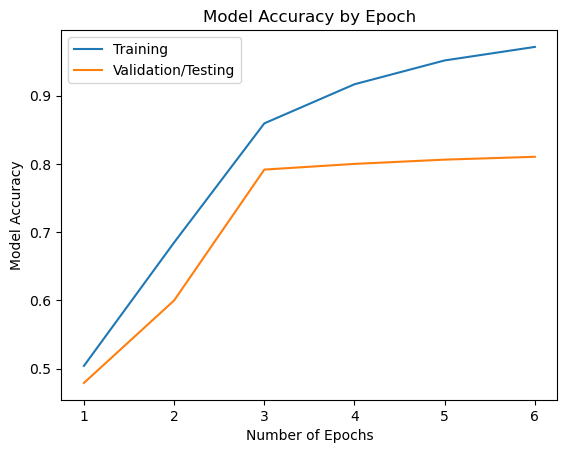

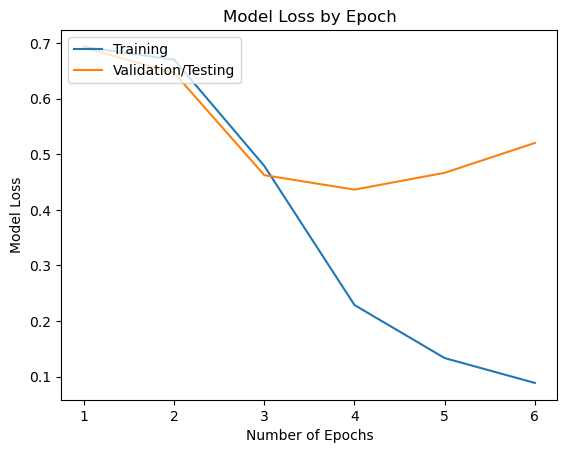

In [54]:
# D3 - Visualization of Model Accuracy
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy by Epoch')
    plt.ylabel('Model Accuracy')
    plt.xlabel('Number of Epochs')
    plt.legend(['Training', 'Validation/Testing'], loc='upper left')
    plt.show()
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss by Epoch')
    plt.ylabel('Model Loss')
    plt.xlabel('Number of Epochs')
    plt.legend(['Training', 'Validation/Testing'], loc='upper left')
    plt.show()
plot_learningCurve(history, 6)

- The validation loss starts to increase after a certain four epochs, while the training loss continues to decrease. This suggests that the model has learned the underlying patterns in the data but is starting to capture the noise in the training data.

## D4: Predictive Accuracy 
- To assess the predictive accuracy of the trained model, the performance was evaluated on the held-out test dataset. This dataset consists of text samples that were not used during the training process, allowing the model's ability to generalize to unseen data to be measured.
- The **evaluate** function in Keras was used to compute the model's accuracy on the test data. The function takes as input the test data and labels, and returns the loss 

In [58]:
# Verify model accuracy on test data (data not seen by the model earlier)
score = model.evaluate(test_padded, test_label, verbose=0)
print(f'Testing data loss: {score[0]} / Testing data accuracy: {score[1]}')

Test loss: 0.7150865793228149 / Test accuracy: 0.7599999904632568


- These results indicate that the model achieves a reasonable predictive accuracy of around 76% on the test data. This suggests that the model has learned the underlying patterns in the training data and can effectively classify the sentiment of new text samples.
- The model was also used to make predictions on the test data. The code snippet below demonstrates how this was done:

In [60]:
# PERFORM PREDICTIONS
predictions = model.predict(test_padded) # could be my_model if you are loading an h5

19/19 [==============================] - 0s 3ms/step


In [61]:
# Verify  the predicted sentiment by comparing to actual label from test data
i = 0 # take any text from test data to verify

print("Predicted review text:" , X_test[i], "\n")
print("Predicted Review:", "Negative" if predictions[i][0] >= 0.5 else "Positive" , "review")
print("Actual Review: ", "Negative" if y_test[i][1] == 0 else "Positive" , "review")

Predicted review text: battery life real good 

Predicted: Positive review
Actual:  Positive review


- This indicates that the model correctly predicted the sentiment of the review as positive. This answered the research question and fulfilled the objective of the analysis.
- In summary, the model's predictive accuracy, as measured by the model accuracy metric, was found to be approximately 76%. This suggests that the model was able to generalize well to unseen data, and its predictions were accurate. However, there is always room for improvement, and the model could be further optimized to improve its performance

# Part V: Summary and Recommendations
## E: Code
- The following code was used to save the trained network within the neural network

In [62]:
# Saving and reloading the model to perform predictions
# SAVE THE MODEL
model.save('illovsky-d213-Task2-SA-Model.h5')

## F: Functionality
### Functionality:
- The developed neural network model effectively addresses the research question of predicting the sentiment of customer reviews by analyzing other reviews. The model utilizes a feedforward neural network architecture with three dense layers, employing the sigmoid activation function throughout the network. The model takes as input customer reviews preprocessed using natural language processing (NLP) techniques, such as text normalization, tokenization, and stemming. These techniques prepare the text data for neural network processing by removing irrelevant characters, converting text to lowercase, breaking down sentences into individual words, and reducing words to their root forms.
- The model learns from a dataset of 3,000 customer reviews, with an 80/20 split for training and testing. The training data provides the model with examples of reviews and their corresponding sentiment labels (positive or negative). The model analyzes the text content of each review, extracting sentiment-related features and patterns. Through the training process, the model adjusts its internal weights and biases to optimize its ability to predict sentiment labels for unseen reviews.
### Impact
- The neural network architecture plays an important role in the model's ability to detect the sentiment of customer reviews with an acceptable degree of accuracy. The feedforward architecture, with its multiple layers and activation functions, allows the model to learn complex relationships between the text features and the sentiment labels. The use of the sigmoid activation function throughout the network introduces non-linearity into the model, enabling it to capture more nuanced and intricate patterns in the data. The sigmoid function also produces a probability score for each sentiment class (positive or negative), providing a measure of confidence in the model's predictions.
- The neural network architecture, combined with the NLP preprocessing steps, enables the model to effectively extract sentiment-related information from the text data. This is particularly important as it allows the model to generalize well to unseen data, and its predictions are accurate. However, there is always room for improvement, and the model could be further optimized to improve its performance

## G: Recommendations
Based on the evaluation of the sentiment analysis model, recommendations are as follows:
### Accuracy Improvement through Tuning
- The model's accuracy of 77% is satisfactory for initial implementation. However, there is still room for improvement. Further tuning of the model's hyperparameters, such as learning rate, optimizer, and activation functions, could potentially enhance the model's performance. Additionally, experimenting with different network architectures, such as recurrent neural networks or convolutional neural networks, could lead to better accuracy.
### Training on Larger Datasets
- The model was trained on a dataset of 3,000 customer reviews. While this is a reasonable size for initial training, increasing the amount of training data could further improve the model's generalization ability and robustness. Collecting and incorporating more diverse reviews from a broader range of sources could enhance the model's ability to capture the nuances of sentiment expression and handle variations in language style.
### Continual Monitoring and Improvement
- Sentiment analysis is an evolving field, and language usage patterns continuously change. Therefore, it is crucial to establish a process for continual monitoring and improvement of the model. Regularly evaluating the model's performance on new data and adapting it to changing language trends will ensure its continued effectiveness in sentiment analysis tasks.
### Implementation
- Given the model's satisfactory performance and the potential for further improvement, implementation is recommended in a production environment. Integrating the model into customer feedback systems and marketing strategies can provide valuable insights into customer sentiment, preferences, and concerns. This information can be leveraged to enhance customer satisfaction and improve product offerings.

# Part VI: Reporting
## H: Reporting
- For reporting purposes along with the Jupyter notebook (an example of an industry-relevant interactive development environment), a pdf of the Jupyter notebook presentation has also been submitted. The file name of the pdf is: ‘d213-illovsky-task2-submited-code.html’
## I.  Web Sources
- Es, S. (2023, September 4). Exploratory Data Analysis for natural language Processing: A complete guide to Python tools. neptune.ai. https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
- Kotzias, Dimitrios. (2015). Sentiment Labelled Sentences. UCI Machine Learning Repository. https://doi.org/10.24432/C57604.

## J.  Sources
- Please, see written report: d213-illovsky-task1-pa-submission; for sources